In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [56]:
data = pd.read_csv('heart.csv').dropna()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [58]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


In [59]:
np.random.seed(42)
ages = np.random.normal(50, 10, 100)

heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.1 * (ages - 70))))

data = {
    'N': len(ages),
    'age': list(ages),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior1.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=False,
                        seed=24252)

18:35:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:35:18 - cmdstanpy - INFO - CmdStan done processing.


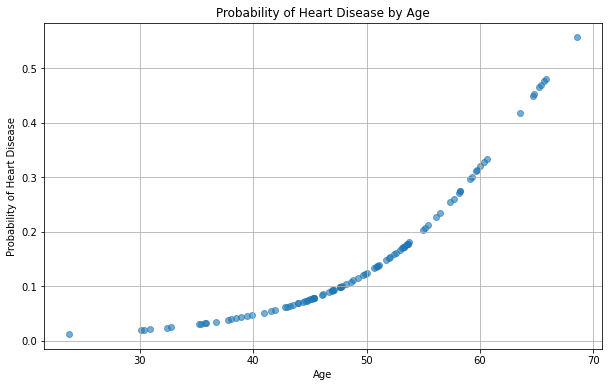

In [60]:
prior1 = sim.draws_pd()

results_df = pd.DataFrame({
    'age': data['age'],
    'heart_disease_prob': prior1.iloc[:, 12:].mean(axis=0)  # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(results_df['age'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age')
plt.grid(True)
plt.show()